In [1]:
pip install pybbn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd # for data manipulation 
import networkx as nx # for drawing graphs
import matplotlib.pyplot as plt # for drawing graphs

# for creating Bayesian Belief Networks (BBN)
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [3]:
data=pd.read_csv('weatherAUS.csv')

In [4]:
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [5]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
data=data[pd.isnull(data['RainTomorrow'])==False]

In [7]:
data=data.fillna(data.mean())

<ipython-input-7-2fdd91382263>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data=data.fillna(data.mean())


In [8]:
def convert(x):
  if x<15:
    return 1
  if 15<=x<=26:
    return 2
  if x>26:
    return 3

In [9]:
data['Temp9am']=data['Temp9am'].apply(convert)

In [10]:
def convert(x):
  if x<24:
    return 1
  if 24<=x<=36:
    return 2
  if x>36:
    return 3

In [11]:
data['Temp3pm']=data['Temp3pm'].apply(convert)

In [12]:
def convert(x):
  if x<16:
    return 1
  if x>=16:
    return 2

In [13]:
data['WindSpeed9am']=data['WindSpeed9am'].apply(convert)

In [14]:
def convert(x):
  if x<15:
    return 1
  if x>=15:
    return 2

In [15]:
data['WindSpeed3pm']=data['WindSpeed3pm'].apply(convert)

In [16]:
data['Temp9am'].value_counts(normalize=True).sort_index()

1    0.397333
2    0.507866
3    0.094801
Name: Temp9am, dtype: float64

In [17]:
data['Temp3pm'].value_counts(normalize=True).sort_index()

1    0.648858
2    0.326676
3    0.024467
Name: Temp3pm, dtype: float64

In [18]:
data['WindSpeed9am'].value_counts(normalize=True).sort_index()

1    0.622626
2    0.377374
Name: WindSpeed9am, dtype: float64

In [19]:
data['WindSpeed3pm'].value_counts(normalize=True).sort_index()

1    0.320951
2    0.679049
Name: WindSpeed3pm, dtype: float64

In [20]:
# This function helps to calculate probability distribution, which goes into BBN (note, can handle up to 2 parents)
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob

In [21]:
T9am = BbnNode(Variable(0, 'T9am', ['<=15','15-26','>=26']), probs(data, child='Temp9am'))
T3pm = BbnNode(Variable(1, 'T3pm', ['<=24','24-36','>36']), probs(data, child='Temp3pm', parent1='Temp9am'))
W9am = BbnNode(Variable(2, 'W9am', ['<16','>16']), probs(data, child='WindSpeed9am'))
W3pm = BbnNode(Variable(3, 'W3pm', ['<15','>=15']), probs(data, child='WindSpeed3pm', parent1='WindSpeed9am'))
RT = BbnNode(Variable(4, 'RT', ['No', 'Yes']), probs(data, child='RainTomorrow', parent1='WindSpeed3pm', parent2='Temp3pm'))

# Create Network
bbn = Bbn() \
    .add_node(T9am) \
    .add_node(T3pm) \
    .add_node(W9am) \
    .add_node(W3pm) \
    .add_node(RT) \
    .add_edge(Edge(T9am, T3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(T3pm, RT, EdgeType.DIRECTED)) \
    .add_edge(Edge(W9am, W3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(W3pm, RT, EdgeType.DIRECTED))

# Convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

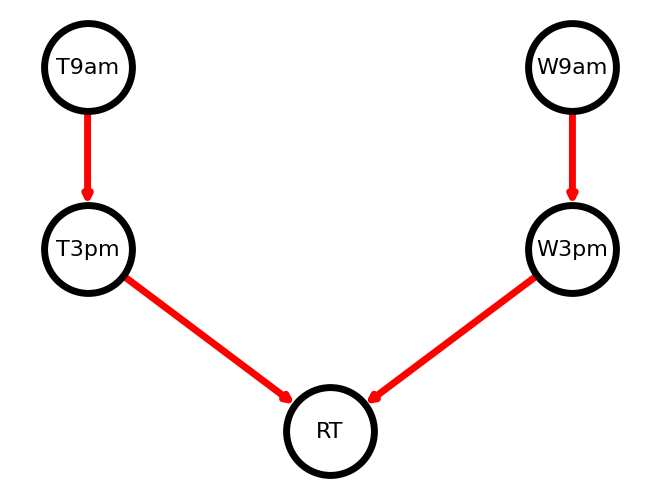

In [22]:
# Set node positions
pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 2),3: (1,0.5), 4: (0, -1)}

# Set options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "white",
    "edgecolors": "black",
    "edge_color": "red",
    "linewidths": 5,
    "width": 5,}
    
# Generate graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

In [23]:
# Define a function for printing marginal probabilities
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
        
# Use the above function to print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.32095
3=>=15|0.67905
----------------
Node: 2|W9am|<16,>16
Values:
2=<16|0.62263
2=>16|0.37737
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|0.64886
1=24-36|0.32668
1=>36|0.02447
----------------
Node: 0|T9am|<=15,15-26,>=26
Values:
0=<=15|0.39733
0=15-26|0.50787
0=>=26|0.09480
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.81798
4=Yes|0.18202
----------------


In [24]:
# To add evidence of events that happened so probability distribution can be recalculated
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
# Use above function to add evidence
evidence('ev1', 'T9am', '>=26', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.32095
3=>=15|0.67905
----------------
Node: 2|W9am|<16,>16
Values:
2=<16|0.62263
2=>16|0.37737
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|0.05267
1=24-36|0.74013
1=>36|0.20720
----------------
Node: 0|T9am|<=15,15-26,>=26
Values:
0=<=15|0.00000
0=15-26|0.00000
0=>=26|1.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.80896
4=Yes|0.19104
----------------


evidence 1

In [25]:
evidence('ev1', 'T9am', '>=26', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.32095
3=>=15|0.67905
----------------
Node: 2|W9am|<16,>16
Values:
2=<16|0.62263
2=>16|0.37737
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|0.64886
1=24-36|0.32668
1=>36|0.02447
----------------
Node: 0|T9am|<=15,15-26,>=26
Values:
0=<=15|0.39733
0=15-26|0.50787
0=>=26|0.09480
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.81798
4=Yes|0.18202
----------------


very less chance of rain tommorow since probability of No is 0.81798
probability of yes is 0.18202

In [26]:
evidence('ev2', 'T9am', '<=15', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.32095
3=>=15|0.67905
----------------
Node: 2|W9am|<16,>16
Values:
2=<16|0.62263
2=>16|0.37737
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|0.97522
1=24-36|0.02476
1=>36|0.00002
----------------
Node: 0|T9am|<=15,15-26,>=26
Values:
0=<=15|1.00000
0=15-26|0.00000
0=>=26|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.83140
4=Yes|0.16860
----------------


very less chance of rain tommorow since probability of No is 0.83140
probability of yes is 0.16860

In [27]:
evidence('ev3', 'T3pm', '24-36', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.32095
3=>=15|0.67905
----------------
Node: 2|W9am|<16,>16
Values:
2=<16|0.62263
2=>16|0.37737
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|0.00000
1=24-36|1.00000
1=>36|0.00000
----------------
Node: 0|T9am|<=15,15-26,>=26
Values:
0=<=15|1.00000
0=15-26|0.00000
0=>=26|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.78311
4=Yes|0.21689
----------------


very less chance of rain tommorow since probability of No is 0.78311
probability of yes is 0.21689

In [28]:
evidence('ev4', 'T3pm', '<=24', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.32095
3=>=15|0.67905
----------------
Node: 2|W9am|<16,>16
Values:
2=<16|0.62263
2=>16|0.37737
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|1.00000
1=24-36|0.00000
1=>36|0.00000
----------------
Node: 0|T9am|<=15,15-26,>=26
Values:
0=<=15|1.00000
0=15-26|0.00000
0=>=26|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.83262
4=Yes|0.16738
----------------


very less chance of rain tommorow since probability of No is 0.83262
probability of yes is 0.16738

In [29]:
evidence('ev5', 'W9am', '<16', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.42703
3=>=15|0.57297
----------------
Node: 2|W9am|<16,>16
Values:
2=<16|1.00000
2=>16|0.00000
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|1.00000
1=24-36|0.00000
1=>36|0.00000
----------------
Node: 0|T9am|<=15,15-26,>=26
Values:
0=<=15|1.00000
0=15-26|0.00000
0=>=26|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.82328
4=Yes|0.17672
----------------


very less chance of rain tommorow since probability of No is 0.82328
probability of yes is 0.17672

In [30]:
evidence('ev6', 'W3pm', '>=15', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.00000
3=>=15|1.00000
----------------
Node: 2|W9am|<16,>16
Values:
2=<16|1.00000
2=>16|0.00000
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|1.00000
1=24-36|0.00000
1=>36|0.00000
----------------
Node: 0|T9am|<=15,15-26,>=26
Values:
0=<=15|1.00000
0=15-26|0.00000
0=>=26|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.86090
4=Yes|0.13910
----------------


very less chance of rain tommorow since probability of No is 0.86090
probability of yes is 0.13910